In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

# Carregar o dataset
# Substitua 'caminho_para_seu_dataset.csv' pelo caminho real do seu arquivo CSV
df = pd.read_csv('CRT_DEGRAU_2_VZ40.csv', delimiter=';',encoding='utf-8')

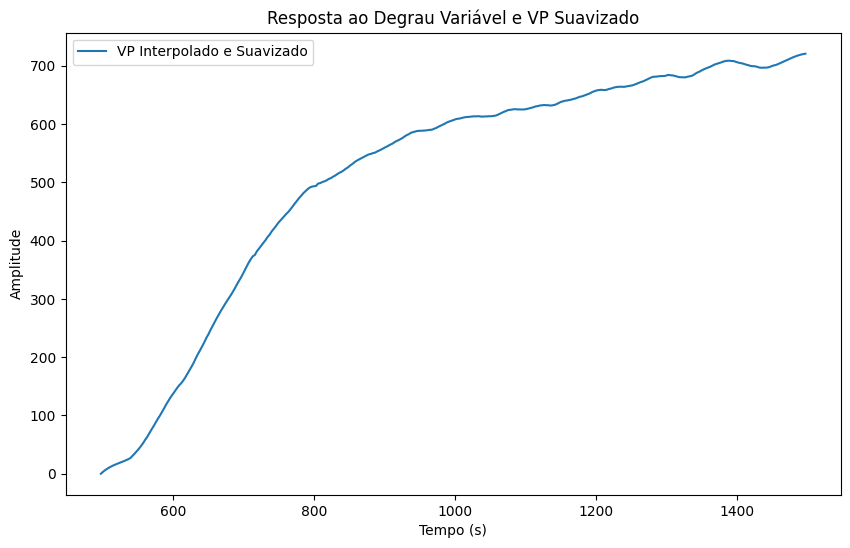

In [67]:
# Supondo que 'TIME' é a coluna de tempo, 'SC' a coluna com os valores do degrau, e 'VP' a resposta em frequência
# Selecionando dados a partir do índice 166
df_subset = df.iloc[166:]

tempo = df_subset['TIME'].values
degrau = df_subset['SC'].values
vp = df_subset['VP'].values

# Deslocar a amplitude inicial de VP para zero
vp_deslocado = vp - vp[0]

# Tratar pontos de dados anômalos antes da interpolação
std_dev = np.std(vp_deslocado)
mean_val = np.mean(vp_deslocado)
filtered_vp = np.array([pt if abs(pt - mean_val) < 2 * std_dev else mean_val for pt in vp_deslocado])

# Interpolação dos valores de VP deslocados e filtrados
interpolator = interp1d(tempo, filtered_vp, kind='linear')
vp_interpolado = interpolator(tempo)

# Suavização dos valores interpolados (ajuste a janela e a ordem conforme necessário)
vp_suavizado = savgol_filter(vp_interpolado, 30, 3)  # Janela e polinômio de ordem 3

# Plotar as respostas
plt.figure(figsize=(10, 6))
plt.plot(tempo, vp_suavizado - vp_suavizado[0], label='VP Interpolado e Suavizado')  # Deslocar a resposta suavizada também
plt.title('Resposta ao Degrau Variável e VP Suavizado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

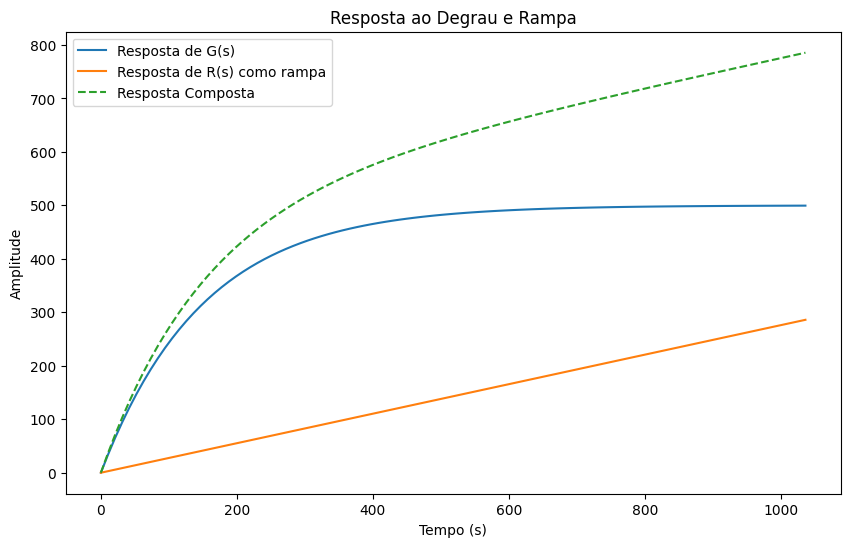

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Definir as funções de transferência G(s) e R(s)
#G = control.TransferFunction([342], [266, 1])
G = control.TransferFunction([500], [150, 1])
R = control.TransferFunction([0.276], [1, 0])

# Simular resposta ao degrau para cada função de transferência
t, y_G = control.step_response(G)
_, y_R = control.step_response(R, T=t)

# # A resposta de R(s) precisa ser multiplicada por t para simular uma rampa
# y_R_rampa = y_R * t

# A resposta composta é a soma das respostas individuais
y_composta = y_G + y_R

# Plotar as respostas
plt.figure(figsize=(10, 6))
plt.plot(t, y_G, label='Resposta de G(s)')
plt.plot(t, y_R, label='Resposta de R(s) como rampa')
plt.plot(t, y_composta, label='Resposta Composta', linestyle='--')
plt.title('Resposta ao Degrau e Rampa')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


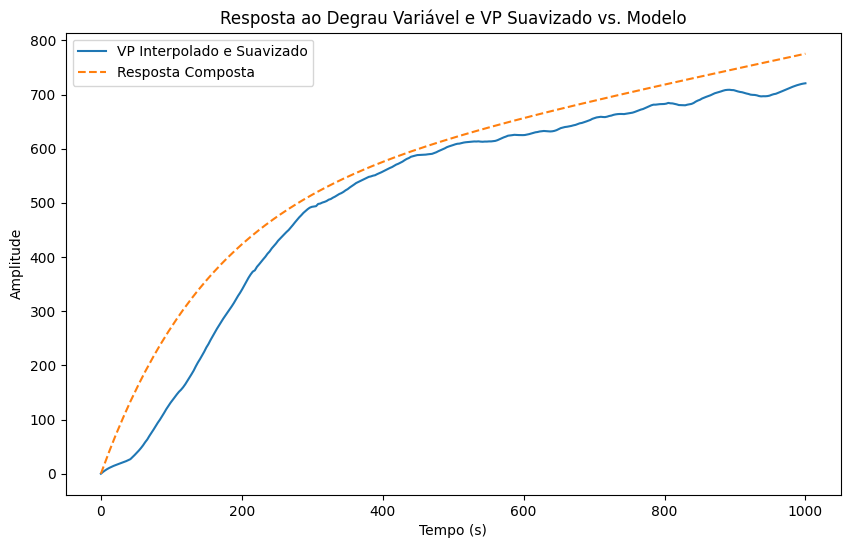

In [85]:
# Ajustar 'tempo' para começar de 0
tempo_ajustado = tempo - tempo[0]

# Interpolar y_composta para corresponder aos pontos de tempo de tempo_ajustado
from scipy.interpolate import interp1d

# Crie um interpolador para y_composta
interpolator_composta = interp1d(t, y_composta, kind='linear', bounds_error=False, fill_value="extrapolate")

# Use o interpolador para obter valores de y_composta nos pontos de tempo_ajustado
y_composta_interpolado = interpolator_composta(tempo_ajustado)

# Plotar as respostas
plt.figure(figsize=(10, 6))
plt.plot(tempo_ajustado, vp_suavizado - vp_suavizado[0], label='VP Interpolado e Suavizado')
plt.plot(tempo_ajustado, y_composta_interpolado, label='Resposta Composta', linestyle='--')
plt.title('Resposta ao Degrau Variável e VP Suavizado vs. Modelo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
